# Microphone Recorder

This Jupyter notebook demonstrates how to record audio using a microphone and save the recording as a WAV file. We use the `pyaudio` library for capturing audio data. This example includes classes for managing the recording process, saving files, and playback.

## Prerequisites

Before running the notebook, ensure you have the necessary packages installed:

In [16]:
# Installing necessary packages
%pip install pyaudio scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Importing necessary libraries
import pyaudio
import wave
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

In [18]:
# Initialize PyAudio
p = pyaudio.PyAudio()

# Get and print the list of available input devices along with the number of channels
input_devices = []
for i in range(p.get_device_count()):
    device_info = p.get_device_info_by_index(i)
    if device_info["maxInputChannels"] > 0:
        input_devices.append((i, device_info["name"], device_info["maxInputChannels"]))
        print(
            f"Device ID {i}: {device_info['name']} - Channels: {device_info['maxInputChannels']}"
        )

Device ID 1: Galaxy Buds2 Pro - Channels: 1
Device ID 3: MacBook Pro Microphone - Channels: 1
Device ID 5: Gabriel’s iPhone Microphone - Channels: 1
Device ID 6: Microsoft Teams Audio - Channels: 2


In [19]:
# Prompt the user to select a device by entering the device ID
selected_device_id = int(
    input("Enter the Device ID of the input device you want to use: ")
)

# Retrieve the number of channels for the selected device
selected_device_info = next(
    (device for device in input_devices if device[0] == selected_device_id), None
)
if selected_device_info:
    selected_channels = selected_device_info[2]
    print(f"Selected Device ID: {selected_device_id}, Channels: {selected_channels}")
else:
    print("Invalid Device ID")

Selected Device ID: 3, Channels: 1


In [20]:
import wave
import os

# Audio recording parameters
RATE = 16000  # Sample rate
CHANNELS = (
    selected_channels  # Use the number of channels available on the selected device
)
CHUNK = 1024  # Buffer size
FORMAT = pyaudio.paInt16  # Audio format
duration = 10  # Duration of recording in seconds

In [21]:
# Directory for saving recordings
folder_name = "mp3_audio_files"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [22]:
# Start audio recording
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                input_device_index=selected_device_id,
                frames_per_buffer=CHUNK)

print("Recording started...")
frames = []

# Recording loop
for i in range(0, int(RATE / CHUNK * duration)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Recording finished.")

# Stop and close the stream
stream.stop_stream()
stream.close()
p.terminate()

Recording started...
Recording finished.


In [23]:
# Save the recorded data as a WAV file
filename = os.path.join(folder_name, "recorded_audio.wav")
wf = wave.open(filename, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b"".join(frames))
wf.close()
print(f"Audio saved to {filename}")

Audio saved to mp3_audio_files/recorded_audio.wav


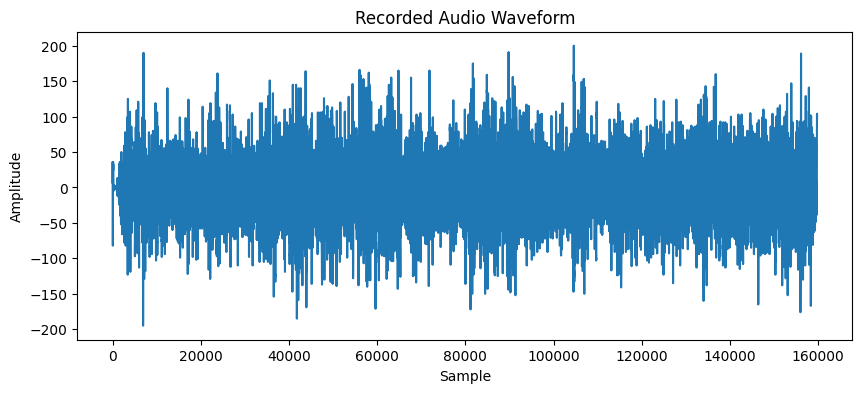

In [24]:
# Read and plot the recorded audio
from scipy.io.wavfile import read as scipy_wave_read

fs, data = scipy_wave_read(filename)
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Recorded Audio Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()